<a href="https://colab.research.google.com/github/dchlseo/DataScienceProjects/blob/main/DeepLearningBasics/TensorFlow/04_VGGNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN (VGGNet)

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
np.random.seed(7777)
tf.random.set_seed(7777)

### Data Import

In [5]:
class DataLoader():

  def __init__(self):
    (self.train_x, self.train_y), \
      (self.test_x, self.test_y) = tf.keras.datasets.mnist.load_data()

  def validate_pixel_scale(self, x):
    return 255 >= x.max() and 0 <= x.min()

  def scale(self, x):
    return (x/255.0).astype(np.float32)  # range 0~1

  def preprocess_dataset(self, dataset):
    (feature, target) = dataset

    validated_x = np.array([x for x in feature if self.validate_pixel_scale(x)])
    validated_y = np.array([y for x, y in zip(feature, target) if self.validate_pixel_scale(x)])

    # scaling
    scaled_x = np.array([self.scale(x) for x in validated_x])

    # expand
    expanded_x = scaled_x[:, :, :, np.newaxis]  # new axis is for color (1=gray, 3=color)

    # label encoding
    ohe_y = np.array([tf.keras.utils.to_categorical(y, num_classes=10) for y in validated_y])

    return expanded_x, ohe_y

  def get_train_dataset(self):
    return self.preprocess_dataset((self.train_x, self.train_y))

  def get_test_dataset(self):
    return self.preprocess_dataset((self.test_x, self.test_y))


In [6]:
mnist_loader = DataLoader()
train_x, train_y = mnist_loader.get_train_dataset()
test_x, test_y = mnist_loader.get_test_dataset()

print(train_x.shape, train_x.dtype)
print(train_y.shape, train_y.dtype)

print(test_x.shape, test_x.dtype)
print(test_y.shape, test_y.dtype)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) float32
(60000, 10) float32
(10000, 28, 28, 1) float32
(10000, 10) float32


### Layers

Layers used in VGGNet:
 - `tf.keras.layers.Conv2D`
 - `tf.keras.layers.Activation`
 - `tf.keras.layers.MaxPool2D`
 - `tf.keras.layers.Flatten`
 - `tf.keras.layers.Dense`




__Conv2D__
 - filters: layer에서 사용할 Filter(weights)의 갯수
 - kernel_size: Filter(weights)의 사이즈
 - strides: 몇 개의 pixel을 skip 하면서 훑어지나갈 것인지 (출력 피쳐맵의 사이즈에 영향을 줌)
 - padding: zero padding을 만들 것인지. VALID는 Padding이 없고, SAME은 Padding이 있음 (출력 피쳐맵의 사이즈에 영향을 줌)
 - activation: Activation Function을 지정

In [9]:
# filters=64, kernel size=3x3, strides=1, padding='same', activation='relu'

tf.keras.layers.Conv2D(64, 3, 1, padding='same', activation='relu')

__MaxPool2D__

- pool_size: Pooling window 크기
- strides: 몇 개의 pixel을 skip 하면서 훑어지나갈 것인지
- padding: zero padding을 만들 것인지

In [11]:
tf.keras.layers.MaxPool2D

keras.src.layers.pooling.max_pooling2d.MaxPooling2D

__Dense__

- units : 노드 갯수
- activation : 활성화 함수
- use_bias : bias 를 사용 할 것인지
- kernel_initializer : 최초 가중치를 어떻게 세팅 할 것인지
- bias_initializer : 최초 bias를 어떻게 세팅 할 것인지

In [12]:
tf.keras.layers.Dense

keras.src.layers.core.dense.Dense

### Modeling

In [13]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [14]:
model = tf.keras.Sequential()

In [16]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1))) # first layer requires input shape
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D()) # default pool_size = (2,2)
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

In [18]:
lr = 0.03
opt = tf.keras.optimizers.Adam(lr)
loss = tf.keras.losses.categorical_crossentropy

model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [ ]:
hist = model.fit(train_x, train_y, epochs=10, batch_size=128, validation_data=(test_x, test_y))

Epoch 1/10
469/469 [==============================] - 380s 810ms/step - loss: 2.3032 - accuracy: 0.1102 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 2/10
469/469 [==============================] - 323s 688ms/step - loss: 2.3030 - accuracy: 0.1071 - val_loss: 2.3030 - val_accuracy: 0.1135
Epoch 3/10
426/469 [==========================>...] - ETA: 27s - loss: 2.3030 - accuracy: 0.1064

In [22]:
hist.history

{'loss': [2.30324649810791,
  2.3030359745025635,
  2.3031022548675537,
  2.302686929702759,
  2.302983522415161,
  2.303197145462036,
  2.303199052810669,
  2.303281784057617,
  2.3033738136291504,
  2.3033909797668457],
 'accuracy': [0.11016666889190674,
  0.10705000162124634,
  0.10708333551883698,
  0.10989999771118164,
  0.10913333296775818,
  0.10723333060741425,
  0.10805000364780426,
  0.10713333636522293,
  0.10864999890327454,
  0.1060333326458931],
 'val_loss': [2.3014538288116455,
  2.3030102252960205,
  2.303572177886963,
  2.3038628101348877,
  2.3036842346191406,
  2.3045644760131836,
  2.3037259578704834,
  2.302751064300537,
  2.302884101867676,
  2.302565813064575],
 'val_accuracy': [0.11349999904632568,
  0.11349999904632568,
  0.11349999904632568,
  0.11349999904632568,
  0.11349999904632568,
  0.11349999904632568,
  0.10279999673366547,
  0.11349999904632568,
  0.11349999904632568,
  0.10279999673366547]}

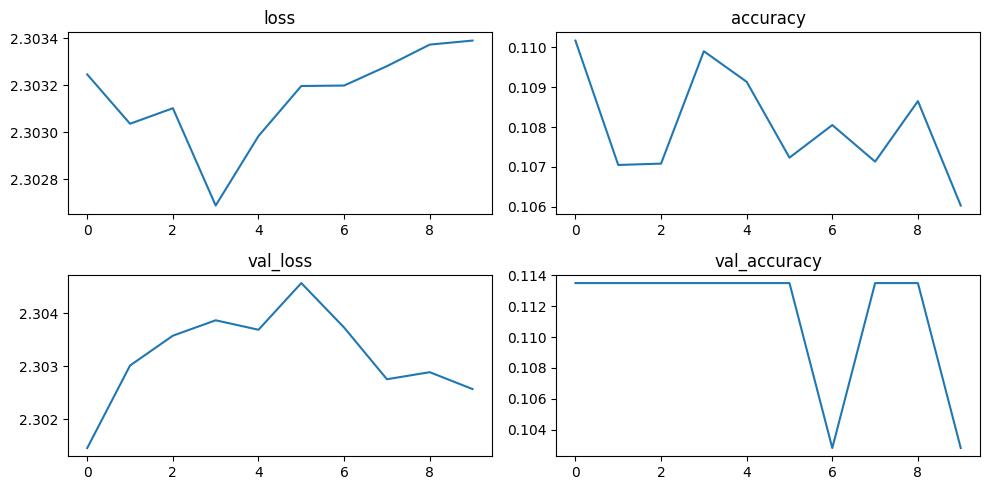

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(hist.history['loss'])
plt.title('loss')
plt.subplot(222)
plt.plot(hist.history['accuracy'])
plt.title('accuracy')
plt.subplot(223)
plt.plot(hist.history['val_loss'])
plt.title('val_loss')
plt.subplot(224)
plt.plot(hist.history['val_accuracy'])
plt.title('val_accuracy')

plt.tight_layout()
plt.show()